# Homework Assignment 2
### [The Art of Analyzing Big Data - The Data Scientist’s Toolbox](https://www.ise.bgu.ac.il/labs/fire/lectures.html)
#### By Dr. Michael Fire 

## Dataset Collecting

**Question 1**: Write a function that collects all titles and number of votes for each title of a given [hacker news page](http://news.ycombinator.com) (15pt)


In [ ]:
import requests
from bs4 import BeautifulSoup

def collect_title_votes(link):
    data = []
    raw_html = requests.get(link).content.decode('utf-8')
    html_parser = BeautifulSoup(raw_html, 'html.parser')
    titles = [item.text for item in html_parser.findAll('a', attrs={'class':"storylink"})]
    td_class = html_parser.findAll('td', attrs={'class':"subtext"})
    votes = []
    for td in td_class:
      vote = td.find('span', attrs={'class':"score"})
      vote = '0' if vote is None else vote.text.split(" ")[0]
      votes.append(vote)
    # print(votes)
    return {ti: vo for ti,vo in zip(titles, votes)}

collect_title_votes("https://news.ycombinator.com/")

{'A Spectre Is Haunting Unicode': '287',
 'Academic Substack: Open, Free, and Subject to Review': '52',
 'An Earth-sized rogue planet discovered in the Milky Way': '172',
 'An ex-ARM engineer critiques RISC-V': '112',
 'BCON20 – Blender Conference: Together Apart [video]': '61',
 'D2iQ (formerly Mesosphere) sunsetting DC/OS and focusing on Kubernetes': '55',
 'De Bruijn Sequences (2011) [video]': '21',
 'Emulating regexp lookarounds in GNU sed': '5',
 'Everything you need to know about windsocks': '63',
 'First beta release of Alire, the package manager for Ada/SPARK': '64',
 'NAT Slipstreaming': '416',
 'Netflix Android and iOS Studio Apps now powered by Kotlin Multiplatform': '24',
 'No new locally-acquired coronavirus cases in Australia yesterday': '69',
 "Overcoming Writer's Block": '6',
 'Photos from inside a Typhoon class submarine': '536',
 'Pine64 Smarphone Spare Parts': '60',
 'Poll: 62% of Americans Say They Have Political Views They’re Afraid to Share': '88',
 'Precursor, a 

**Question 2**:  Write a function that collects data on four James Bond movies from [The Movie Database](https://www.themoviedb.org). You can use [tmdbv3api](https://pypi.org/project/tmdbv3api/) (15pt)

In [ ]:
!pip install tmdbv3api
from tmdbv3api import TMDb
import random

tmdb = TMDb()
tmdb.api_key = '1ba0d0ed4c48910b552a5d296dcd1af2'
tmdb.language = 'en'

def collect_bond_movies():
    from tmdbv3api import Movie
    movie = Movie()
    bond_movies = movie.search('James Bond')
    final_movies = set()
    while (len(final_movies) != 4):
      final_movies.add(random.choice(bond_movies))
    return final_movies

collect_bond_movies()

{In Search of James Bond with Jonathan Ross,
 James Bond Supports International Women's Day,
 James Bond: For Real,
 James Bond: License to Thrill}

## Kickstarter Projects Dataset

Using the [Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv) and Pandas, please answer one of following questions:

### <span style="color:red"> Please answer only **one** of the following questions according to your (ID number + 1) (use the formula **<YOUR_ID> mod 3 +1**) </span>

In [ ]:
# which question to answer - put your ID number and run the code 
your_id  = "305284515"
q = (int(your_id) + 1) % 3 + 1
print("You need to answer questions %s and 4" % q)

You need to answer questions 2 and 4


In [49]:
from google.colab import files
files.upload() #upload kaggle.json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
kaggle.json


In [51]:
!kaggle datasets download kemical/kickstarter-projects -p ./datasets/kickstarter-projects/
!unzip ./datasets/kickstarter-projects/*.zip  -d ./datasets/kickstarter-projects/

kickstarter-projects.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./datasets/kickstarter-projects/kickstarter-projects.zip
replace ./datasets/kickstarter-projects/ks-projects-201612.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./datasets/kickstarter-projects/ks-projects-201612.csv  
replace ./datasets/kickstarter-projects/ks-projects-201801.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yA
  inflating: ./datasets/kickstarter-projects/ks-projects-201801.csv  


**Question 1:** On average which project category received the lowest number of backers? (15 pt) 

**Question 2:** On average which project category received the lowest pledged USD? (15 pt)

In [64]:
import pandas as pd
df = pd.read_csv('./datasets/kickstarter-projects/ks-projects-201801.csv')
categories = df.groupby(by='category')['usd pledged'].mean().sort_values()
for key, val in categories.items():
  print(f'Lowest caregory is: {key} with avg of : {val} pledged USD')
  break

Lowest caregory is: Crochet with avg of : 268.8665432098765 pledged USD


**Question 3:** In which month is there the lowest number of projects? (15 pt)

**Question 4 (for all):** Visualize your answer using matplotlib or seaborn (15pt)

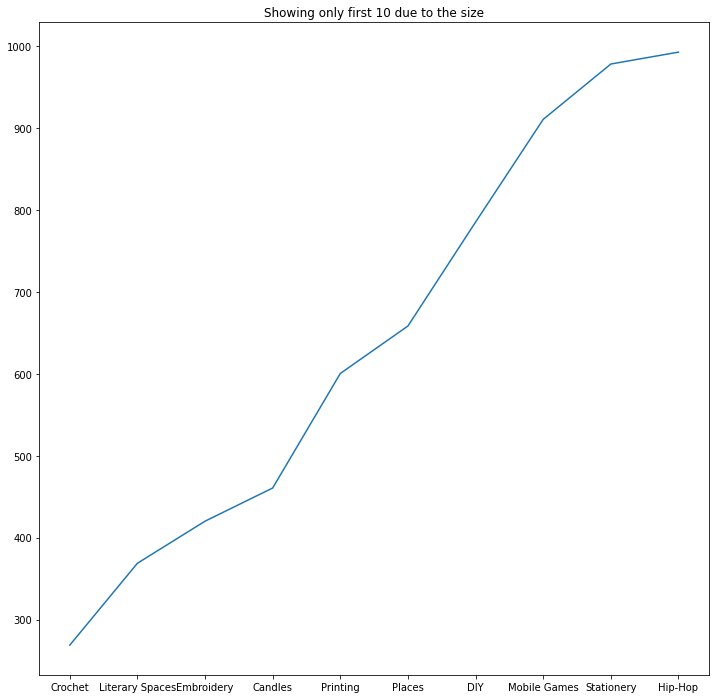

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline 

fig = plt.figure(figsize=(12, 12))
keys_short = [key for key in categories.keys()]
plt.plot(keys_short[:10], categories.values[:10])
plt.title("Showing only first 10 due to the size")
plt.show()

## The Marvel Universe Social Network

Using the [The Marvel Universe Social Network](https://www.kaggle.com/csanhueza/the-marvel-universe-social-network) and  Pandas, please answer the following questions:

**Question 1:** Write code which calculate the top-10 most friendly characters, i.e., characters with the 
    highest number of friends. Please use _hero_network.csv_ file (15pt). 
    
**Note:** Not all the links in this dataset are symmetric.

In [73]:
!kaggle datasets download csanhueza/the-marvel-universe-social-network -p ./datasets/marvel/
!unzip ./datasets/marvel/*.zip  -d ./datasets/marvel/

  0% 0.00/2.72M [00:00<?, ?B/s]
100% 2.72M/2.72M [00:00<00:00, 91.0MB/s]
Archive:  ./datasets/marvel/the-marvel-universe-social-network.zip
  inflating: ./datasets/marvel/edges.csv  
  inflating: ./datasets/marvel/hero-network.csv  
  inflating: ./datasets/marvel/nodes.csv  


In [94]:
df = pd.read_csv('./datasets/marvel/hero-network.csv')
df = df.drop_duplicates()

In [96]:
heros = df.groupby("hero1").count().reset_index()
heros.columns=["Hero", "Friends"]
heros.sort_values(by="Friends", ascending=False).head(10)

,Hero,Friends
826,CAPTAIN AMERICA,1426
5103,SPIDER-MAN/PETER PAR,1286
2555,IRON MAN/TONY STARK,1132
6073,WOLVERINE/LOGAN,1036
4717,SCARLET WITCH/WANDA,1004
5499,THING/BENJAMIN J. GR,1003
2449,HUMAN TORCH/JOHNNY S,962
3666,MR. FANTASTIC/REED R,957
5520,THOR/DR. DONALD BLAK,947
5836,VISION,919


**Question 2:** Using Pandas and Networkx create a graph object of The Marvel Universe Social Network with the 150 most "friendly" characters (10pt).
    The vertices in that graph need to be relative to the size of each character's number of links (also referred to as the vertex degree) (10pt).
Please color each node in the graph according to character type according to data in the *nodes.csv* file (5pt)

In [ ]:
top_num = 150
heros = df.groupby("hero1").count().reset_index()
heros.columns=["Hero", "Friends"]
heros.sort_values(by="Friends", ascending=False).head(top_num)["Hero"].to_list()
top150 = heros.sort_values(by="Friends", ascending=False).head(top_num)
top150_list = top150["Hero"].to_list()
top150_list_names = [hero.split("/")[0] for hero in top150_list]
edges = [] 
for idx,row in df.iterrows():
  if row["hero1"] in top150_list and row["hero2"] in top150_list:
    edges.append((row["hero1"].split("/")[0], row["hero2"].split("/")[0]))

import networkx as nx
g = nx.DiGraph()
g.add_nodes_from(top150_list_names)
g.add_edges_from(edges)
plt.figure(3,figsize=(14,14))
sizes = heros.sort_values(by="Friends", ascending=False).head(top_num)["Friends"].to_list()
sizes = [size*3 for size in sizes]
nx.draw_kamada_kawai(g, with_labels=True, node_size=sizes)
# All of the nodes are type Hero, so no need to color them =]